# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [108]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [109]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()

api_key = os.getenv("newsAPI")
type(api_key)

str

In [110]:
print(api_key)

ccf948e6faa74a2091eba3f10653c951


In [111]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [112]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
#Bitcoin_news_articles = newsapi.get_top_headlines(q="bitcoin", language="en")
bitcoin_news_articles = newsapi.get_everything(q='bitcoin', language="en", sort_by="relevancy")
bitcoin_news_articles

{'status': 'ok',
 'totalResults': 10066,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Arielle Pardes',
   'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
   'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
   'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
   'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
   'publishedAt': '2022-05-10T16:59:46Z',
   'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'Exx

In [113]:
print(f"Total articles about bitcoin: {bitcoin_news_articles['totalResults']}")

Total articles about bitcoin: 10066


In [114]:
bitcoin_news_articles["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [115]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_articles = newsapi.get_everything(q='ethereum', language="en", sort_by="relevancy")
ethereum_news_articles

{'status': 'ok',
 'totalResults': 4696,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Here's what NFTs look like on Instagram",
   'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
   'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
   'publishedAt': '2022-05-10T13:10:20Z',
   'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Kyle Ba

In [116]:
print(f"Total articles about ethereum: {ethereum_news_articles['totalResults']}")

Total articles about ethereum: 4696


In [117]:
ethereum_news_articles["articles"][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': "Here's what NFTs look like on Instagram",
 'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
 'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
 'publishedAt': '2022-05-10T13:10:20Z',
 'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"}

In [118]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [119]:
bitcoin_df_copy = bitcoin_df['text'].values
bitcoin_df_copy
#bitcoin_df_copy = bitcoin_df_copy

array(['Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]',
       'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]',
       'Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]',
       'As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the weight of nearly three feet of snow. You can guess how well that … [+3390 chars]',
       "Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend a

In [120]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
3,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
4,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954


In [121]:
ethereum_df_copy = ethereum_df['text'].values
ethereum_df_copy

array(["Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]",
       'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]',
       'A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]',
       'When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]',
       'GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custo

In [122]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_df.describe()  


,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.091585,0.059550,0.079700,0.860700
std,0.401681,0.062411,0.078177,0.104845
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.381800,0.000000,0.039000,0.827000
50%,-0.162400,0.049000,0.063000,0.888000
75%,0.156025,0.085000,0.103750,0.930250
max,0.750600,0.202000,0.300000,0.964000


In [123]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.055585,0.039550,0.046150,0.91440
std,0.365057,0.055696,0.044724,0.05249
min,-0.690800,0.000000,0.000000,0.82200
25%,-0.273200,0.000000,0.000000,0.86350
50%,-0.127900,0.000000,0.050000,0.93600
75%,0.109025,0.066000,0.068250,0.95425
max,0.690800,0.178000,0.178000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [124]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [125]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

In [126]:
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
#sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [127]:
# Complete the tokenizer function
def tokenizer(text):
#    """Tokenizes text."""
    
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [128]:
#test1 = '111' + bitcoin_df_copy[0]
#test1

In [129]:
#regex = re.compile("[^a-zA-Z ]")
#re_clean = regex.sub(' ', test1)
#re_clean

In [130]:
bitcoin_tokens_test = []
for text in bitcoin_df_copy:
    sentence = sent_tokenize(text)
#    print(sentence)
    bitcoin_tokens_test1 = []
    for sen in sentence:
        bitcoin_tokens_def = tokenizer(sen)
#        print(bitcoin_tokens_def)
        bitcoin_tokens_test1.append(bitcoin_tokens_def)
#        print(bitcoin_tokens_test1)
    bitcoin_tokens_test.append(bitcoin_tokens_test1)
#    bitcoin_tokens_test.append(bitcoin_tokens_def)
print(bitcoin_tokens_test)

[[['even', 'though', 'number', 'woman', 'focused', 'crypto', 'space', 'odeniran', 'say', 'woman', 'still', 'underrepresented'], ['ive', 'space', 'im', 'black', 'person', 'woman', 'b', 'char']], [['bitcoin', 'mining', 'site', 'powered', 'otherwise', 'lost', 'gas', 'oil', 'well', 'near', 'linden', 'texas', 'april', 'th'], ['photo', 'francois', 'picard', 'afp', 'via', 'getty', 'images', 'corporate', 'climate', 'hype', 'fl', 'char']], [['warren', 'buffett', 'ha', 'always', 'bitcoin', 'skeptic'], ['billionaire', 'investor', 'harsh', 'word', 'yet', 'cryptocurrency', 'weekend'], ['buffett', 'made', 'clear', 'opposition', 'crypt', 'char']], [['kid', 'remember', 'father', 'tried', 'use', 'broom', 'handle', 'last', 'ditch', 'effort', 'support', 'roof', 'wa', 'collapsing', 'weight', 'nearly', 'three', 'foot', 'snow'], ['guess', 'well', 'char']], [['image', 'source', 'getty', 'images', 'value', 'bitcoin', 'continued', 'fall', 'weekend', 'dropped', 'according', 'coinbase', 'cryptocurrency', 'exchan

In [131]:
bitcoin_flatList = []
for elem in bitcoin_tokens_test:
    bitcoin_flatList1 = []
    for elem1 in elem:
        bitcoin_flatList1.extend(elem1)
#        print('Flat List1 : ', bitcoin_flatList1)
    bitcoin_flatList.extend(bitcoin_flatList1)
print('Bitcoin Flat List : ', bitcoin_flatList)

Bitcoin Flat List :  ['even', 'though', 'number', 'woman', 'focused', 'crypto', 'space', 'odeniran', 'say', 'woman', 'still', 'underrepresented', 'ive', 'space', 'im', 'black', 'person', 'woman', 'b', 'char', 'bitcoin', 'mining', 'site', 'powered', 'otherwise', 'lost', 'gas', 'oil', 'well', 'near', 'linden', 'texas', 'april', 'th', 'photo', 'francois', 'picard', 'afp', 'via', 'getty', 'images', 'corporate', 'climate', 'hype', 'fl', 'char', 'warren', 'buffett', 'ha', 'always', 'bitcoin', 'skeptic', 'billionaire', 'investor', 'harsh', 'word', 'yet', 'cryptocurrency', 'weekend', 'buffett', 'made', 'clear', 'opposition', 'crypt', 'char', 'kid', 'remember', 'father', 'tried', 'use', 'broom', 'handle', 'last', 'ditch', 'effort', 'support', 'roof', 'wa', 'collapsing', 'weight', 'nearly', 'three', 'foot', 'snow', 'guess', 'well', 'char', 'image', 'source', 'getty', 'images', 'value', 'bitcoin', 'continued', 'fall', 'weekend', 'dropped', 'according', 'coinbase', 'cryptocurrency', 'exchange', 'w

In [132]:
#bitcoin_tokens_test = []
#for sen in sentence:
#    bitcoin_tokens_def = tokenizer(sen)
#    bitcoin_tokens_test.append(bitcoin_tokens_def)
#print(bitcoin_tokens_test)

In [133]:
#bitcoin_tokens_list = []
#    for sen in sentence:    
#        bitcoin_tokens_test = tokenizer(sen)
#        bitcoin_tokens_list.append(bitcoin_tokens_test)
#print(bitcoin_tokens_list)

# BITCOIN TOKENS LIST

#for i in bitcoin_df_copy:
#    print(i)
#    sentence = sent_tokenize(i)
#    print(sentence)
#    bitcoin_tokens_list = []
#    for sen in sentence:    
#        bitcoin_tokens_test = tokenizer(sen)
#        bitcoin_tokens_list.append(bitcoin_tokens_test)
#print(bitcoin_tokens_list)

In [134]:
# ETHEREUM TOKENS LIST
#ethereum_tokens_list = []
#for i in ethereum_df['text']:
#    print(i)
#    ethereum_tokens_test = tokenizer(i)
#    ethereum_tokens_list.append(ethereum_tokens_test)
#print(ethereum_tokens_list)

########
ethereum_tokens_test = []
for text in ethereum_df_copy:
    sentence = sent_tokenize(text)
#    print(sentence)
    ethereum_tokens_test1 = []
    for sen in sentence:
        ethereum_tokens_def = tokenizer(sen)
        ethereum_tokens_test1.append(ethereum_tokens_def)
#    print(bitcoin_tokens_test1)
    ethereum_tokens_test.append(ethereum_tokens_test1)
print(ethereum_tokens_test)

[[['meta', 'ha', 'revealed', 'nfts', 'work', 'instagram'], ['us', 'based', 'test', 'show', 'bought', 'created', 'free', 'connecting', 'instagram', 'account', 'compatible', 'digital', 'walle', 'char']], [['gamestop', 'ha', 'officially', 'thrown', 'headlong', 'web', 'viper', 'nest', 'new', 'app', 'release', 'though', 'hard', 'say', 'whether', 'proposed', 'population', 'gamers', 'game', 'developer', 'take', 'char']], [['multi', 'billion', 'dollar', 'cryptocurrency', 'company', 'ha', 'apologised', 'user', 'sale', 'metaverse', 'land', 'sparked', 'frenzy', 'temporarily', 'brought', 'ethereum', 'cryptocurrency'], ['yuga', 'labs', 'comp', 'char']], [['bored', 'ape', 'yacht', 'club', 'creator', 'yuga', 'labs', 'announced', 'otherside', 'nft', 'collection', 'would', 'launch', 'april', 'wa', 'predicted', 'many', 'biggest', 'nft', 'launch', 'ever'], ['otherside', 'upcoming', 'bore', 'char']], [['gamestop', 'going', 'crypto'], ['video', 'game', 'retailer', 'launched', 'self', 'custodial', 'ethereum

In [135]:
ethereum_flatList = []
for elem in ethereum_tokens_test:
    ethereum_flatList1 = []
    for elem1 in elem:
        ethereum_flatList1.extend(elem1)
#        print('Flat List1 : ', bitcoin_flatList1)
    ethereum_flatList.extend(ethereum_flatList1)
print('Ethereum Flat List : ', ethereum_flatList)

Ethereum Flat List :  ['meta', 'ha', 'revealed', 'nfts', 'work', 'instagram', 'us', 'based', 'test', 'show', 'bought', 'created', 'free', 'connecting', 'instagram', 'account', 'compatible', 'digital', 'walle', 'char', 'gamestop', 'ha', 'officially', 'thrown', 'headlong', 'web', 'viper', 'nest', 'new', 'app', 'release', 'though', 'hard', 'say', 'whether', 'proposed', 'population', 'gamers', 'game', 'developer', 'take', 'char', 'multi', 'billion', 'dollar', 'cryptocurrency', 'company', 'ha', 'apologised', 'user', 'sale', 'metaverse', 'land', 'sparked', 'frenzy', 'temporarily', 'brought', 'ethereum', 'cryptocurrency', 'yuga', 'labs', 'comp', 'char', 'bored', 'ape', 'yacht', 'club', 'creator', 'yuga', 'labs', 'announced', 'otherside', 'nft', 'collection', 'would', 'launch', 'april', 'wa', 'predicted', 'many', 'biggest', 'nft', 'launch', 'ever', 'otherside', 'upcoming', 'bore', 'char', 'gamestop', 'going', 'crypto', 'video', 'game', 'retailer', 'launched', 'self', 'custodial', 'ethereum', '

In [136]:
len(bitcoin_tokens_test)

20

In [137]:
bitcoin_df.shape

(20, 6)

In [138]:
len(ethereum_tokens_test)

20

In [139]:
ethereum_df.shape

(20, 6)

In [140]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!


In [141]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [142]:
from collections import Counter
from nltk import ngrams

In [143]:
#print(bitcoin_tokens_test)

In [144]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
#bitcoin_mystring = ''
#for i in bitcoin_tokens_test:
#    mystring = ''
#    for j in i:
#        mystring = mystring + ' ' + j
#    print(mystring)
#    bitcoin_mystring += mystring
#print(bitcoin_mystring)

In [145]:
# Get bitcoin word counts
word_counts_bitcoin = Counter(bitcoin_flatList)
print(dict(word_counts_bitcoin))

{'even': 1, 'though': 1, 'number': 1, 'woman': 3, 'focused': 1, 'crypto': 2, 'space': 2, 'odeniran': 1, 'say': 1, 'still': 1, 'underrepresented': 1, 'ive': 1, 'im': 1, 'black': 1, 'person': 1, 'b': 2, 'char': 19, 'bitcoin': 16, 'mining': 1, 'site': 1, 'powered': 1, 'otherwise': 1, 'lost': 1, 'gas': 1, 'oil': 1, 'well': 2, 'near': 1, 'linden': 1, 'texas': 1, 'april': 2, 'th': 1, 'photo': 3, 'francois': 1, 'picard': 1, 'afp': 1, 'via': 1, 'getty': 2, 'images': 2, 'corporate': 1, 'climate': 1, 'hype': 1, 'fl': 1, 'warren': 1, 'buffett': 2, 'ha': 4, 'always': 1, 'skeptic': 1, 'billionaire': 1, 'investor': 4, 'harsh': 1, 'word': 1, 'yet': 1, 'cryptocurrency': 11, 'weekend': 2, 'made': 1, 'clear': 1, 'opposition': 1, 'crypt': 1, 'kid': 1, 'remember': 1, 'father': 1, 'tried': 1, 'use': 1, 'broom': 1, 'handle': 1, 'last': 4, 'ditch': 1, 'effort': 1, 'support': 1, 'roof': 1, 'wa': 3, 'collapsing': 1, 'weight': 1, 'nearly': 1, 'three': 1, 'foot': 1, 'snow': 1, 'guess': 1, 'image': 1, 'source': 1

In [146]:
# Get ethereum word counts
word_counts_ethereum = Counter(ethereum_flatList)
print(dict(word_counts_ethereum))

{'meta': 1, 'ha': 8, 'revealed': 1, 'nfts': 3, 'work': 1, 'instagram': 2, 'us': 1, 'based': 2, 'test': 1, 'show': 1, 'bought': 1, 'created': 1, 'free': 1, 'connecting': 1, 'account': 1, 'compatible': 1, 'digital': 3, 'walle': 1, 'char': 20, 'gamestop': 2, 'officially': 1, 'thrown': 1, 'headlong': 1, 'web': 1, 'viper': 1, 'nest': 1, 'new': 2, 'app': 1, 'release': 1, 'though': 1, 'hard': 1, 'say': 1, 'whether': 1, 'proposed': 1, 'population': 1, 'gamers': 2, 'game': 2, 'developer': 1, 'take': 2, 'multi': 1, 'billion': 3, 'dollar': 2, 'cryptocurrency': 10, 'company': 1, 'apologised': 1, 'user': 1, 'sale': 3, 'metaverse': 2, 'land': 2, 'sparked': 1, 'frenzy': 1, 'temporarily': 1, 'brought': 1, 'ethereum': 7, 'yuga': 2, 'labs': 2, 'comp': 1, 'bored': 2, 'ape': 1, 'yacht': 2, 'club': 2, 'creator': 2, 'announced': 1, 'otherside': 2, 'nft': 4, 'collection': 1, 'would': 3, 'launch': 2, 'april': 3, 'wa': 2, 'predicted': 1, 'many': 1, 'biggest': 5, 'ever': 2, 'upcoming': 1, 'bore': 1, 'going': 1,

In [147]:
# Get bitcoin bigram count
#bitcoin_ngrams = ''.join(bitcoin_tokens_list)
#bitcoin_bigram_counts = Counter(ngrams(bitcoin_flatList, n=2))
bitcoin_bigram_counts = Counter(ngrams(bitcoin_flatList, n=2))
print(dict(bitcoin_bigram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'woman'): 1, ('woman', 'focused'): 1, ('focused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 2, ('char', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picard'): 1, ('picard', 'afp'): 1, ('afp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 2, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climat

In [148]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
#ethereum_mystring = ''
#for i in ethereum_tokens_test:
#    mystring = ''
#    for j in i:
#        mystring = mystring + ' ' + j
#    print(mystring)
#    ethereum_mystring += mystring
#print(ethereum_mystring)

In [149]:
# Get bitcoin bigram count
#ethereum_bigram_counts = Counter(ngrams(ethereum_flatList, n=2))
ethereum_bigram_counts = Counter(ngrams(ethereum_flatList, n=2))
print(dict(ethereum_bigram_counts))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'us'): 1, ('us', 'based'): 1, ('based', 'test'): 1, ('test', 'show'): 1, ('show', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'char'): 1, ('char', 'gamestop'): 2, ('gamestop', 'ha'): 1, ('ha', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'char'):

In [150]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [151]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

#print(dict(bitcoin_bigram_counts.most_common(10)))
bitcoin_bigram_counts = token_count(bitcoin_bigram_counts, N=10)
print(dict(bitcoin_bigram_counts))

{('may', 'reuters'): 5, ('reuters', 'bitcoin'): 5, ('previous', 'close'): 4, ('close', 'bitcoin'): 4, ('bitcoin', 'world'): 4, ('world', 'biggest'): 4, ('biggest', 'best'): 4, ('best', 'known'): 4, ('known', 'cryptocurrency'): 4, ('char', 'may'): 4}


In [152]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

ethereum_bigram_counts = token_count(ethereum_bigram_counts, N=10)
print(dict(ethereum_bigram_counts))

{('may', 'reuters'): 4, ('reuters', 'bitcoin'): 4, ('previous', 'close'): 4, ('close', 'bitcoin'): 4, ('bitcoin', 'world'): 4, ('world', 'biggest'): 4, ('biggest', 'best'): 4, ('best', 'known'): 4, ('known', 'cryptocurrency'): 4, ('char', 'may'): 3}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

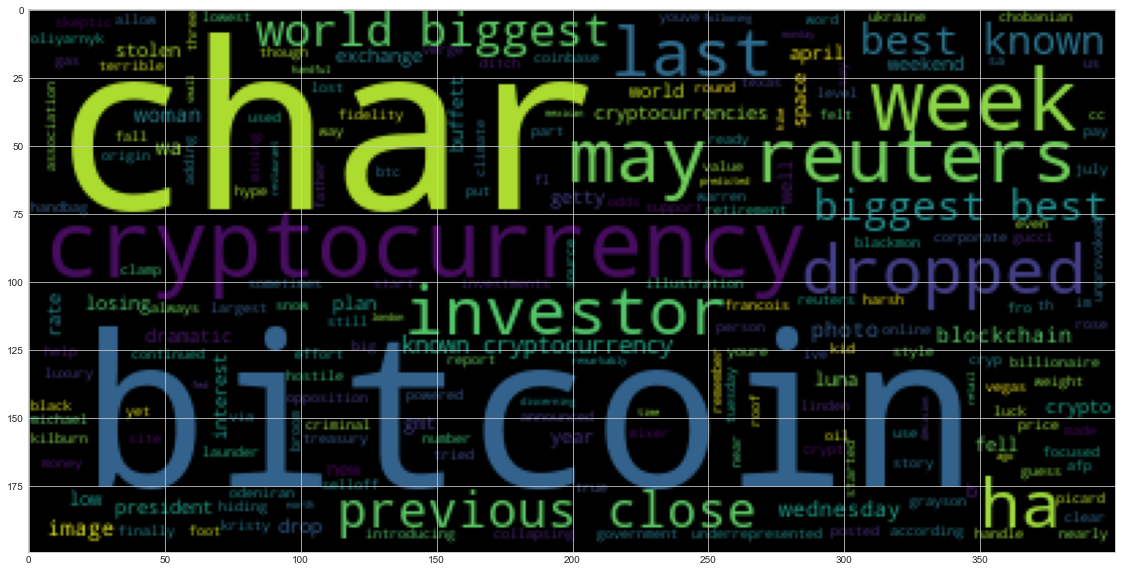

In [154]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
#bitcoin_cloud = ' '.join(bitcoin_tokens)
bitcoin_cloud = ' '.join(bitcoin_flatList)
bitcoin_wc = WordCloud().generate(bitcoin_cloud)
plt.imshow(bitcoin_wc)

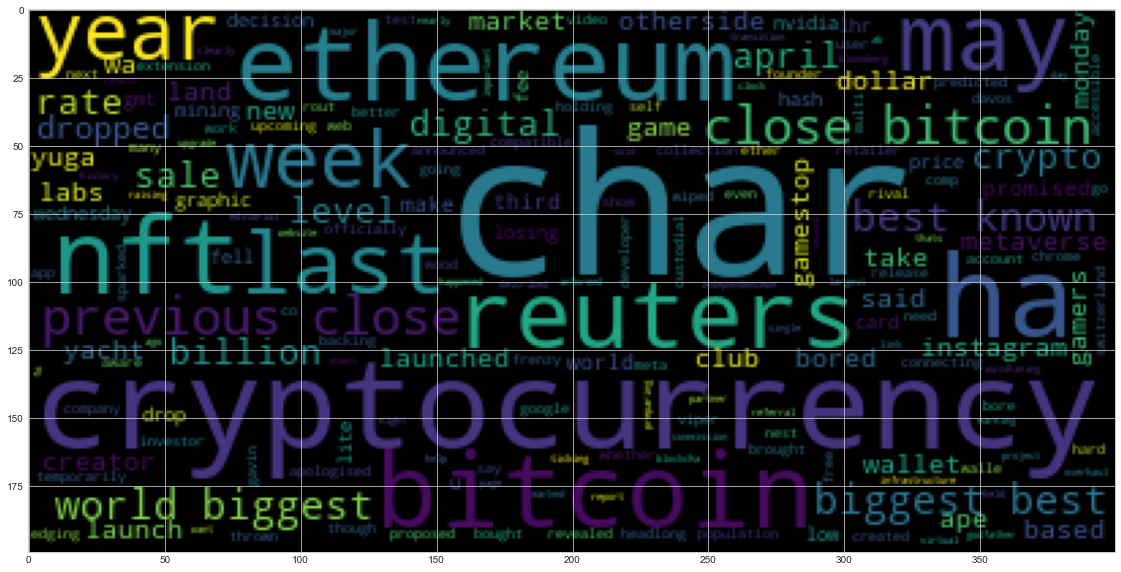

In [155]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
#ethereum_cloud = ' '.join(ethereum_tokens)
ethereum_cloud = ' '.join(ethereum_flatList)
ethereum_wc = WordCloud().generate(ethereum_cloud)
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [156]:
import spacy
from spacy import displacy

In [157]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [158]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [159]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

bitcoin_text_concat = bitcoin_df.text[0]
for i in bitcoin_df.loc[1:,'text']:   
    bitcoin_text_concat = bitcoin_text_concat + " " + i
print(bitcoin_text_concat)

Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images

 

 Of all the corporate climate hype fl… [+6544 chars] Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars] As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the weight of nearly three feet of snow. You can guess how well that … [+3390 chars] Image source, Getty Images
The value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Co

In [160]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(bitcoin_text_concat)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "This is the NER visualization for BITCOIN"

In [161]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

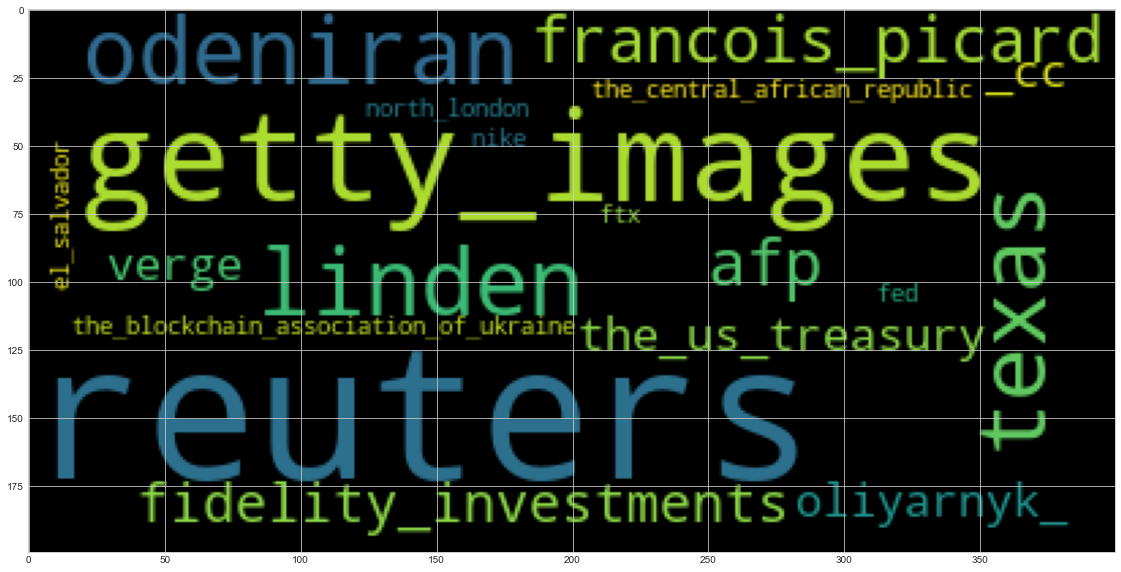

In [162]:
# List all Entities
# YOUR CODE HERE!
bitcoin_entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
bitcoin_entities = [i.lower().replace(' ', '_') for i in bitcoin_entities]
bitcoin_wc = WordCloud().generate(' '.join(bitcoin_entities))
plt.imshow(bitcoin_wc)

---

### Ethereum NER

In [163]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text_concat = ethereum_df.text[0]
for i in ethereum_df.loc[1:,'text']:   
    ethereum_text_concat = ethereum_text_concat + " " + i
print(ethereum_text_concat)

Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars] GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars] A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.
Yuga Labs, the comp… [+3475 chars] When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars] GameStop is going all-in on crypto. The video game retailer launched its own self-custodial Ethereum digital wallet, it said Monday. The wall

In [164]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(ethereum_text_concat)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "This is the NER visualization for ETHEREUM"

In [165]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

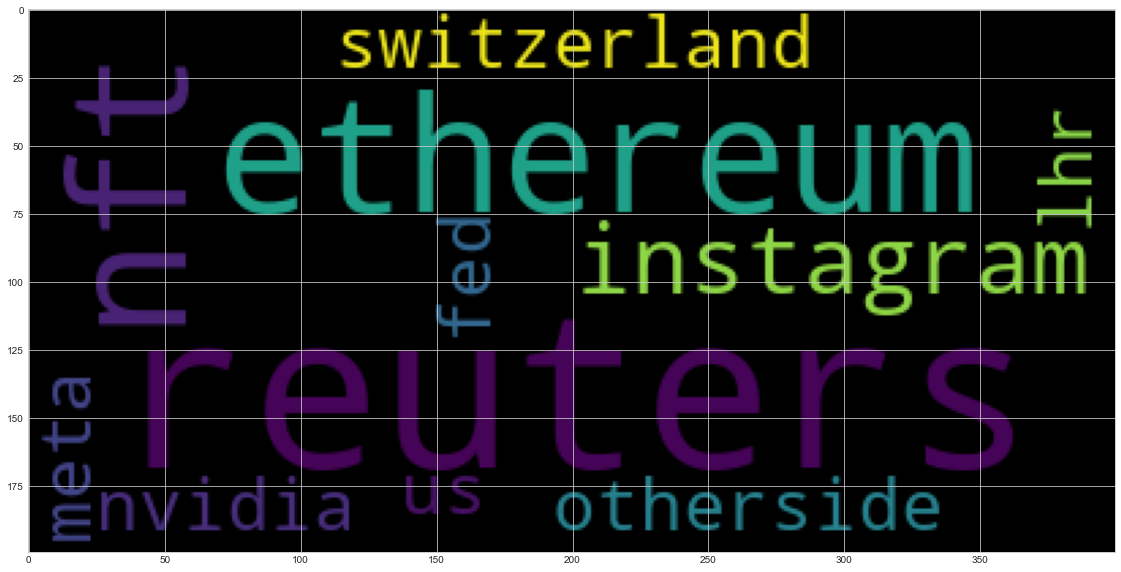

In [166]:
# List all Entities
# YOUR CODE HERE!
ethereum_entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]
ethereum_entities = [i.lower().replace(' ', '_') for i in ethereum_entities]
ethereum_wc = WordCloud().generate(' '.join(ethereum_entities))
plt.imshow(ethereum_wc)

---